📥 Loading images...
✅ Loaded 500 good products and 500 defective products.
🚀 Training SVM model...

📊 Evaluation:
✅ Accuracy: 0.47
📋 Classification Report:
                    precision    recall  f1-score   support

     Good Product       0.46      0.54      0.50        96
Defective Product       0.49      0.40      0.44       104

         accuracy                           0.47       200
        macro avg       0.47      0.47      0.47       200
     weighted avg       0.47      0.47      0.47       200



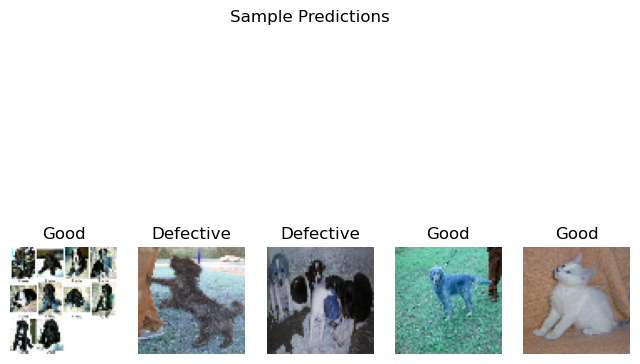

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


IMG_SIZE = 64
DATA_DIR = "train"  # Folder containing images
CATEGORIES = ["good_product", "defective_product"]  # Reframed labels


data = []
labels = []

good_count = 0
defective_count = 0
limit = 500  # Limit per class

print("📥 Loading images...")

for img in os.listdir(DATA_DIR):
    try:
        path = os.path.join(DATA_DIR, img)
        img_array = cv2.imread(path)
        resized_img = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        flat_img = resized_img.flatten()

        if img.startswith("cat") and good_count < limit:
            data.append(flat_img)
            labels.append(0)  # 0 = good product
            good_count += 1

        elif img.startswith("dog") and defective_count < limit:
            data.append(flat_img)
            labels.append(1)  # 1 = defective product
            defective_count += 1

        if good_count >= limit and defective_count >= limit:
            break

    except Exception as e:
        print(f"Error with image {img}: {e}")

print(f"✅ Loaded {good_count} good products and {defective_count} defective products.")


X = np.array(data)
y = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("🚀 Training SVM model...")
model = SVC(kernel='linear')
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print("\n📊 Evaluation:")
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("📋 Classification Report:\n", classification_report(y_test, y_pred, target_names=["Good Product", "Defective Product"]))


plt.figure(figsize=(8, 6))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test[i].reshape(IMG_SIZE, IMG_SIZE, 3))
    plt.title("Good" if y_pred[i]==0 else "Defective")
    plt.axis('off')
plt.suptitle("Sample Predictions")
plt.show()
